<a href="https://colab.research.google.com/github/Sushmithaa-Pandian/Machine_learning_sush/blob/main/WetDry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [96]:
train_dataset_path ='/content/data/train'
test_dataset_path='/content/data/test'

In [97]:
IMG_WIDTH = 224
IMG_HEIGHT = 224


In [98]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),

                                                   class_mode='binary',
                                                   shuffle=True)

Found 14 images belonging to 2 classes.


In [117]:
from matplotlib.rcsetup import validate_fontsize_None
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(test_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),

                                                             class_mode='binary',
                                                             shuffle=False)

Found 6 images belonging to 2 classes.


In [118]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : dry
1 : wet


In [119]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
  model = VGG16(
      include_top = False, #whether to include the 3 fully connected layer at the top of the network
      weights = 'imagenet', #Pre-Trained Model
      input_shape = (224,224,3),
      classifier_activation = "sigmoid"
       #Activation Function to be used at the top layer
  )

  return model

In [120]:
model = load_model()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [121]:
def set_Non_trainable_layers(model):
  for layer in model.layers:
    layer.trainable = False
  return model

model =set_Non_trainable_layers(model)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [122]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from tensorflow.keras.models import Sequential

In [123]:
base_model = load_model()
base_model = set_Non_trainable_layers(base_model)
flattening_layer = Flatten()
dense_layer = Dense(256,activation='relu')
prediction_layer = Dense(1,activation='sigmoid')

model = Sequential([
    base_model,
    flattening_layer,
    dense_layer,
    prediction_layer
])

In [124]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               6422784   
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [148]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

# train the model (adjust the number of epochs from 1 to improve performance)
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=5,
            verbose=1)

Epoch 1/5
1/1 [==============================] - 20s 20s/step - loss: 0.0461 - acc: 1.0000 - val_loss: 11.6886 - val_acc: 0.5000
Epoch 2/5
1/1 [==============================] - 17s 17s/step - loss: 13.2420 - acc: 0.5000 - val_loss: 3.6916 - val_acc: 0.5000
Epoch 3/5
1/1 [==============================] - 14s 14s/step - loss: 4.3248 - acc: 0.5000 - val_loss: 0.5425 - val_acc: 0.5000
Epoch 4/5
1/1 [==============================] - 13s 13s/step - loss: 0.5881 - acc: 0.8571 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 5/5
1/1 [==============================] - 14s 14s/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6944 - val_acc: 0.5000


<Figure size 640x480 with 0 Axes>

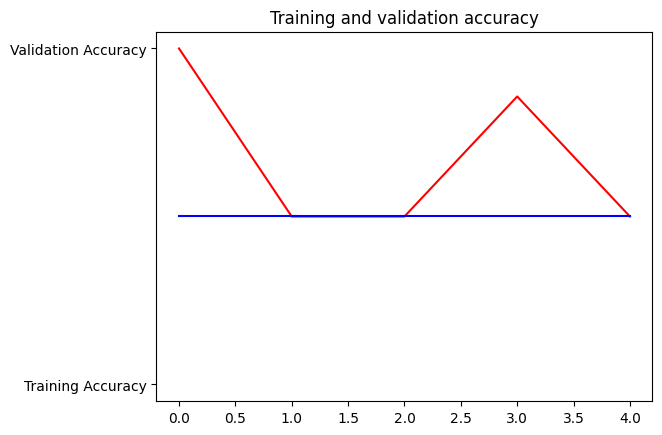

<Figure size 640x480 with 0 Axes>

In [149]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()